In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# import libraries
#import bq_helper
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

set_matplotlib_formats('retina')
%matplotlib inline



In [10]:
log = pd.read_csv('Data/log.csv')
log.head(10)

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,NaN,1,1470117657,1470117657,20160801,"{'visits': 1, 'hits': 3, 'pageviews': 3, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 23, 'minu...",7194065619159478122,NaN,Social,Not Socially Engaged
1,NaN,151,1470083489,1470083489,20160801,"{'visits': 1, 'hits': 3, 'pageviews': 3, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",8159312408158297118,NaN,Social,Not Socially Engaged
2,NaN,1,1470052694,1470052694,20160801,"{'visits': 1, 'hits': 4, 'pageviews': 3, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 4, 'minut...",9236304747882138291,NaN,Social,Not Socially Engaged
3,NaN,1,1470061879,1470061879,20160801,"{'visits': 1, 'hits': 4, 'pageviews': 4, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 7, 'minut...",1792676004815023069,NaN,Social,Not Socially Engaged
4,NaN,1,1470090830,1470090830,20160801,"{'visits': 1, 'hits': 4, 'pageviews': 2, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 15, 'minu...",7305625498291809599,NaN,Social,Not Socially Engaged
5,NaN,1,1470077855,1470077855,20160801,"{'visits': 1, 'hits': 4, 'pageviews': 3, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",5378233269828404918,NaN,Social,Not Socially Engaged
6,NaN,1,1470084135,1470084135,20160801,"{'visits': 1, 'hits': 4, 'pageviews': 4, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",5270776363703942229,NaN,Social,Not Socially Engaged
7,NaN,1,1470074645,1470074645,20160801,"{'visits': 1, 'hits': 5, 'pageviews': 4, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8470886127234408497,NaN,Social,Not Socially Engaged
8,NaN,1,1470091947,1470091947,20160801,"{'visits': 1, 'hits': 5, 'pageviews': 5, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Edge', 'browserVersion': 'not ava...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 15, 'minu...",8861555771453791094,NaN,Social,Not Socially Engaged
9,NaN,1,1470077612,1470077612,20160801,"{'visits': 1, 'hits': 5, 'pageviews': 4, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Opera', 'browserVersion': 'not av...","{'continent': 'Asia', 'subContinent': 'Souther...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8295804655007281109,

In [11]:
# high level stats 

query = """
    SELECT 
        FORMAT("%'d",COUNT(DISTINCT fullVisitorId)) AS users,
        FORMAT("%'d",SUM(totals.visits)) AS visits,
        FORMAT("%'d",SUM(totals.pageviews)) AS pageviews,
        FORMAT("%'d", SUM(totals.transactions)) AS transactions,
        SUM(totals.transactionRevenue)/1000000 AS revenue

    FROM 
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
        _TABLE_SUFFIX BETWEEN '20161001' AND '20161230'
        AND totals.totalTransactionRevenue IS NOT NULL
        
"""
safe_query_job = client.query(query)
high_level_aug = safe_query_job.to_dataframe()
high_level_aug

NameError: name 'client' is not defined

In [32]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [33]:
log1 = pd.read_csv('Data/log1.csv',encoding = 'ISO-8859-1')
log1.head(10)

,sessionId,custId,date,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,topLevelDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,pageviews,bounces,newVisits,revenue
0,200000120,1795,2017-04-25,Social,1493117200,1,0,Chrome,Windows,0,desktop,Asia,Southern Asia,India,Tamil Nadu,NaN,Chennai,airtel.in,in,NaN,quora.com,referral,NaN,0,/How-can-one-get-a-Google-T-shirt-in-India,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
1,400000140,1797,2016-09-04,Social,1473037945,1,0,Safari,Macintosh,0,desktop,Americas,Northern America,United States,NaN,NaN,NaN,comcast.net,net,NaN,youtube.com,referral,NaN,0,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
2,600000160,1799,2016-12-29,Organic Search,1483011213,1,0,Chrome,Windows,0,desktop,Asia,Southern Asia,India,NaN,NaN,NaN,NaN,NaN,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
3,700000170,1800,2016-08-22,Social,1471890172,1,0,Safari,Macintosh,0,desktop,Africa,Eastern Africa,Zambia,NaN,NaN,NaN,ipb.na,na,NaN,youtube.com,referral,NaN,0,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
4,800000180,1801,2017-05-18,Direct,1495146428,1,0,Chrome,Android,1,mobile,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,San Francisco,NaN,NaN,NaN,(direct),NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,0.0
5,1000000110,1803,2016-10-26,Organic Search,1477473890,1,0,Chrome,Macintosh,0,desktop,Europe,Western Europe,France,NaN,NaN,NaN,wanadoo.fr,fr,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,0.0
6,1100000111,1804,2017-03-03,Organic Search,1488556031,1,0,Safari,iOS,1,mobile,Asia,Southern Asia,India,Maharashtra,NaN,Pune,NaN,NaN,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
7,1400000114,1807,2017-03-24,Organic Search,1490361829,1,0,Chrome,Windows,0,desktop,Americas,Northern America,United States,NaN,NaN,NaN,booksys.com,com,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
8,1700000117,1810,2016-11-15,Social,1479211655,1,0,Safari,Macintosh,0,desktop,Asia,Southeast Asia,Thailand,Bangkok,NaN,Bangkok,3bb.co.th,th,NaN,youtube.com,referral,NaN,0,/yt/about/th/,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
9,1700000217,1810,2016-11-15,Social,1479228480,2,16825,Safari,Macintosh,0,desktop,Asia,Southeast Asia,Thailand,Bangkok,NaN,Bangkok,3bb.co.th,th,NaN,youtube.com,referral,NaN,1,/yt/about/th/,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,0.0


In [18]:
log1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70071 entries, 0 to 70070
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   sessionId                       70071 non-null  int64  
 1   custId                          70071 non-null  int64  
 2   date                            70071 non-null  object 
 3   channelGrouping                 70071 non-null  object 
 4   visitStartTime                  70071 non-null  int64  
 5   visitNumber                     70071 non-null  int64  
 6   timeSinceLastVisit              70071 non-null  int64  
 7   browser                         70070 non-null  object 
 8   operatingSystem                 69764 non-null  object 
 9   isMobile                        70071 non-null  int64  
 10  deviceCategory                  70071 non-null  object 
 11  continent                       69986 non-null  object 
 12  subContinent                    

In [20]:
log1.shape

(70071, 35)

In [17]:
len(log1['sessionId'].unique().tolist())

70071

In [21]:
len(log1['custId'].unique().tolist())

47249

In [26]:
log1.isna().any(axis=1)

0        True
1        True
2        True
3        True
4        True
         ... 
70066    True
70067    True
70068    True
70069    True
70070    True
Length: 70071, dtype: bool

In [34]:
log1.loc[log1['revenue']>0.0]

,sessionId,custId,date,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,topLevelDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,pageviews,bounces,newVisits,revenue
14,2500000125,1818,2017-06-12,Organic Search,1497314896,1,0,Firefox,Windows,0,desktop,Americas,Northern America,United States,New York,New York NY,New York,NaN,NaN,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,1.0,39.011570
39,7400000374,1867,2016-11-19,Organic Search,1479569232,3,1221515,Chrome,Macintosh,0,desktop,Asia,Eastern Asia,Hong Kong,NaN,NaN,Hong Kong,netvigator.com,com,NaN,google,organic,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,103.736674
64,11700000211,1910,2017-05-31,Organic Search,1496250741,2,2270,Chrome,Windows,0,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,San Jose,comcast.net,net,NaN,google,organic,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,11.998690
113,19400000119,1987,2017-06-25,Organic Search,1498409785,1,0,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,NaN,NaN,NaN,rr.com,com,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,1.0,31.637178
126,21400000121,2007,2017-01-05,Organic Search,1483643204,1,0,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,California,Los Angeles CA,Los Angeles,rr.com,com,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,1.0,140.892352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70013,9442300000194,96216,2017-03-15,Organic Search,1489632824,1,0,Internet Explorer,Windows,0,desktop,Americas,Northern America,United States,NaN,NaN,NaN,NaN,NaN,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,1.0,99.021310
70027,9444000000394,96233,2016-12-07,Referral,1481127843,3,59467,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,New York,New York NY,New York,NaN,NaN,NaN,mall.googleplex.com,referral,NaN,0,/,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,1634.866000
70029,9444000000594,96233,2017-06-29,Referral,1498764446,5,15207520,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,New York,New York NY,New York,NaN,NaN,NaN,mall.googleplex.com,referral,NaN,0,/,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,143.975300
70062,9448100000194,96274,2017-06-23,Referral,1498272983,1,0,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,NaN,NaN,NaN,comcast.net,net,NaN,mall.googleplex.com,referral,NaN,0,/,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,1.0,31.510590


In [36]:
log1['revenue'].loc[log1['revenue']>0.0].sum()

712279.1916157391

In [41]:
log1['year'] = pd.Series(log1['date']).str[0:4]
log1['month'] = pd.Series(log1['date']).str[5:7]
log1['day'] = pd.Series(log1['date']).str[8:10]
log1.head(5)

,sessionId,custId,date,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,topLevelDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,pageviews,bounces,newVisits,revenue,year,month,day
0,200000120,1795,2017-04-25,Social,1493117200,1,0,Chrome,Windows,0,desktop,Asia,Southern Asia,India,Tamil Nadu,NaN,Chennai,airtel.in,in,NaN,quora.com,referral,NaN,0,/How-can-one-get-a-Google-T-shirt-in-India,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,2017,04,25
1,400000140,1797,2016-09-04,Social,1473037945,1,0,Safari,Macintosh,0,desktop,Americas,Northern America,United States,NaN,NaN,NaN,comcast.net,net,NaN,youtube.com,referral,NaN,0,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,2016,09,04
2,600000160,1799,2016-12-29,Organic Search,1483011213,1,0,Chrome,Windows,0,desktop,Asia,Southern Asia,India,NaN,NaN,NaN,NaN,NaN,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,2016,12,29
3,700000170,1800,2016-08-22,Social,1471890172,1,0,Safari,Macintosh,0,desktop,Africa,Eastern Africa,Zambia,NaN,NaN,NaN,ipb.na,na,NaN,youtube.com,referral,NaN,0,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,2016,08,22
4,800000180,1801,2017-05-18,Direct,1495146428,1,0,Chrome,Android,1,mobile,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,San Francisco,NaN,NaN,NaN,(direct),NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,0.0,2017,05,18


In [223]:
ecom1 = pd.Series(log1.groupby(['year','month'])['revenue'].sum())
ecom1

year  month
2016  08       77168.526887
      09       73800.968338
      10       56383.627786
      11       48602.962747
      12       74777.638514
2017  01       43901.574016
      02       40834.062760
      03       57217.757855
      04       51427.063132
      05       62425.643162
      06       59804.867251
      07       59923.549497
      08        6010.949673
Name: revenue, dtype: float64

In [106]:
log1[log1['revenue']>0.0]

,sessionId,custId,date,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,topLevelDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,pageviews,bounces,newVisits,revenue,year,month,day
14,2500000125,1818,2017-06-12,Organic Search,1497314896,1,0,Firefox,Windows,0,desktop,Americas,Northern America,United States,New York,New York NY,New York,NaN,NaN,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,1.0,39.011570,2017,06,12
39,7400000374,1867,2016-11-19,Organic Search,1479569232,3,1221515,Chrome,Macintosh,0,desktop,Asia,Eastern Asia,Hong Kong,NaN,NaN,Hong Kong,netvigator.com,com,NaN,google,organic,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,103.736674,2016,11,19
64,11700000211,1910,2017-05-31,Organic Search,1496250741,2,2270,Chrome,Windows,0,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,San Jose,comcast.net,net,NaN,google,organic,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,11.998690,2017,05,31
113,19400000119,1987,2017-06-25,Organic Search,1498409785,1,0,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,NaN,NaN,NaN,rr.com,com,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,1.0,31.637178,2017,06,25
126,21400000121,2007,2017-01-05,Organic Search,1483643204,1,0,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,California,Los Angeles CA,Los Angeles,rr.com,com,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,1.0,140.892352,2017,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70013,9442300000194,96216,2017-03-15,Organic Search,1489632824,1,0,Internet Explorer,Windows,0,desktop,Americas,Northern America,United States,NaN,NaN,NaN,NaN,NaN,NaN,google,organic,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,1.0,99.021310,2017,03,15
70027,9444000000394,96233,2016-12-07,Referral,1481127843,3,59467,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,New York,New York NY,New York,NaN,NaN,NaN,mall.googleplex.com,referral,NaN,0,/,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,1634.866000,2016,12,07
70029,9444000000594,96233,2017-06-29,Referral,1498764446,5,15207520,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,New York,New York NY,New York,NaN,NaN,NaN,mall.googleplex.com,referral,NaN,0,/,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,143.975300,2017,06,29
70062,9448100000194,96274,2017-06-23,Referral,1498272983,1,0,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,NaN,NaN,NaN,comcast.net,net,NaN,mall.googleplex.com,referral,NaN,0,/,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,1.0,31.510590,2017,06,23


In [224]:
ecom2 = (log1[log1['revenue']>0.0].groupby(['year','month'])['revenue'].count())
ecom2

year  month
2016  08       564
      09       440
      10       463
      11       455
      12       711
2017  01       360
      02       342
      03       445
      04       454
      05       569
      06       504
      07       522
      08        20
Name: revenue, dtype: int64

In [156]:
ecom

revenue_x  revenue_y     AOV  sessionId_x    CR      RPV  \
year month                                                                
2016 08     77168.526887        564  136.82         6140  0.09  12.3138   
     09     73800.968338        440  167.73         5546  0.08  13.4184   
     10     56383.627786        463  121.78         7076  0.07   8.5246   
     11     48602.962747        455  106.82         8129  0.06   6.4092   
     12     74777.638514        711  105.17         6621  0.11  11.5687   
2017 01     43901.574016        360  121.95         4994  0.07   8.5365   
     02     40834.062760        342  119.40         4748  0.07   8.3580   
     03     57217.757855        445  128.58         5381  0.08  10.2864   
     04     51427.063132        454  113.28         5071  0.09  10.1952   
     05     62425.643162        569  109.71         5374  0.11  12.0681   
     06     59804.867251        504  118.66         5056  0.10  11.8660   
     07     59923.549497        522  114.80         5718  0.09  10.3320   
     08      6010.949673         20  300.55          217  0.09  27.0495   

            sessionId_y  
year month               
2016 08            6140  
     09            5546  
     10            7076  
     11            8129  
     12            6621  
2017 01            4994  
     02            4748  
     03            5381  
     04            5071  
     05            5374  
     06            5056  
     07            5718  
     08             217

In [225]:
ecom3 = (log1.groupby(['year','month'])['sessionId'].count())
ecom3

year  month
2016  08       6140
      09       5546
      10       7076
      11       8129
      12       6621
2017  01       4994
      02       4748
      03       5381
      04       5071
      05       5374
      06       5056
      07       5718
      08        217
Name: sessionId, dtype: int64

In [226]:
ecom = pd.merge(ecom1,ecom2,left_on=['year','month'], right_on=['year','month'], how='left')
ecom.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13 entries, ('2016', '08') to ('2017', '08')
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   revenue_x  13 non-null     float64
 1   revenue_y  13 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 497.0+ bytes


In [227]:
ecom = pd.merge(ecom,ecom3,left_on=['year','month'], right_on=['year','month'], how='left')
ecom.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13 entries, ('2016', '08') to ('2017', '08')
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   revenue_x  13 non-null     float64
 1   revenue_y  13 non-null     int64  
 2   sessionId  13 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 601.0+ bytes


In [228]:
ecom

revenue_x  revenue_y  sessionId
year month                                    
2016 08     77168.526887        564       6140
     09     73800.968338        440       5546
     10     56383.627786        463       7076
     11     48602.962747        455       8129
     12     74777.638514        711       6621
2017 01     43901.574016        360       4994
     02     40834.062760        342       4748
     03     57217.757855        445       5381
     04     51427.063132        454       5071
     05     62425.643162        569       5374
     06     59804.867251        504       5056
     07     59923.549497        522       5718
     08      6010.949673         20        217

In [229]:
ecom['AOV']= round(ecom['revenue_x']/ecom['revenue_y'],2)
ecom['CR'] = round(ecom['revenue_y']/ecom['sessionId'],2)
ecom['RPV'] = ecom['AOV']*ecom['CR']
ecom

revenue_x  revenue_y  sessionId     AOV    CR      RPV
year month                                                           
2016 08     77168.526887        564       6140  136.82  0.09  12.3138
     09     73800.968338        440       5546  167.73  0.08  13.4184
     10     56383.627786        463       7076  121.78  0.07   8.5246
     11     48602.962747        455       8129  106.82  0.06   6.4092
     12     74777.638514        711       6621  105.17  0.11  11.5687
2017 01     43901.574016        360       4994  121.95  0.07   8.5365
     02     40834.062760        342       4748  119.40  0.07   8.3580
     03     57217.757855        445       5381  128.58  0.08  10.2864
     04     51427.063132        454       5071  113.28  0.09  10.1952
     05     62425.643162        569       5374  109.71  0.11  12.0681
     06     59804.867251        504       5056  118.66  0.10  11.8660
     07     59923.549497        522       5718  114.80  0.09  10.3320
     08      6010.949673         20        217  300.55  0.09  27.0495

Text(0, 0.5, 'Value')

<Figure size 1440x1080 with 0 Axes>

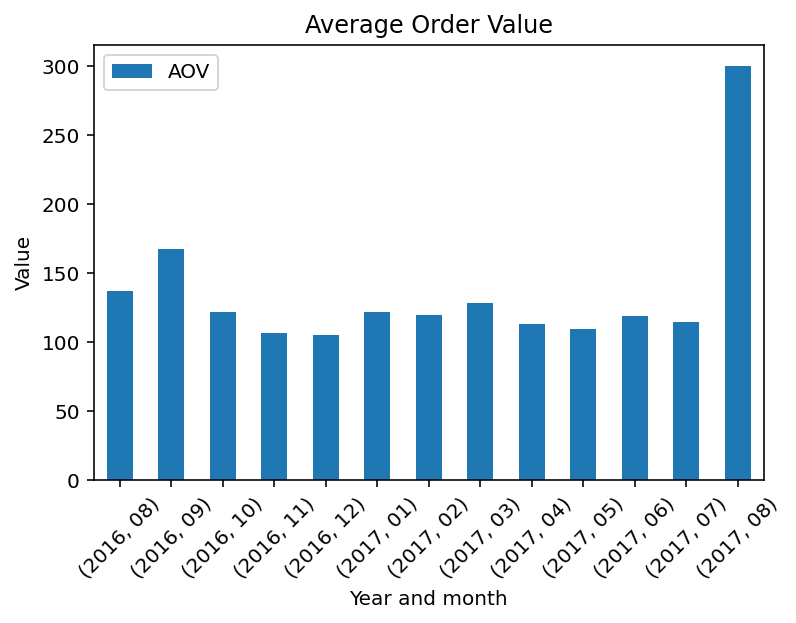

In [244]:
#df = ecom[['year','month','AOV']]
plt.figure(figsize=(20,15))
ax = ecom.plot.bar(y='AOV', rot=45)
plt.title('Average Order Value')
plt.xlabel('Year and month')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

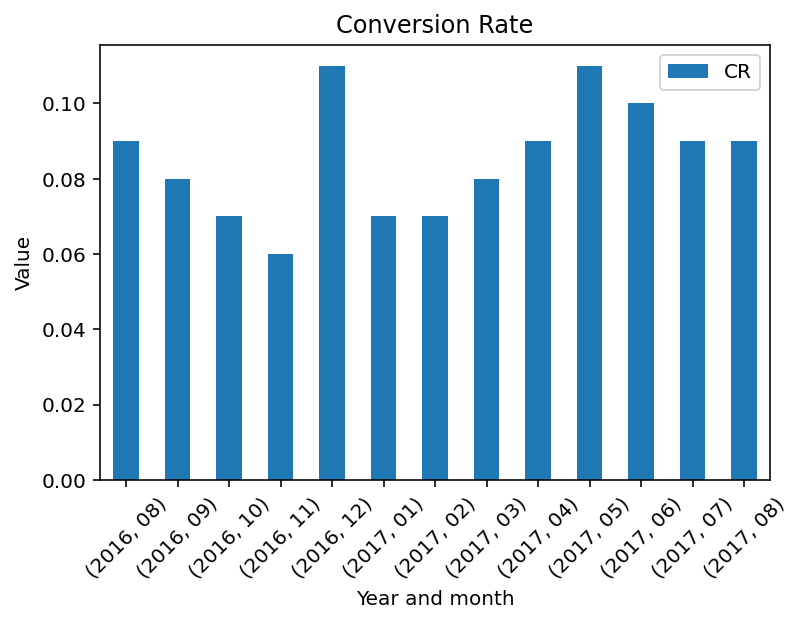

In [245]:
ax = ecom.plot.bar(y='CR', rot=45)
plt.title('Conversion Rate')
plt.xlabel('Year and month')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

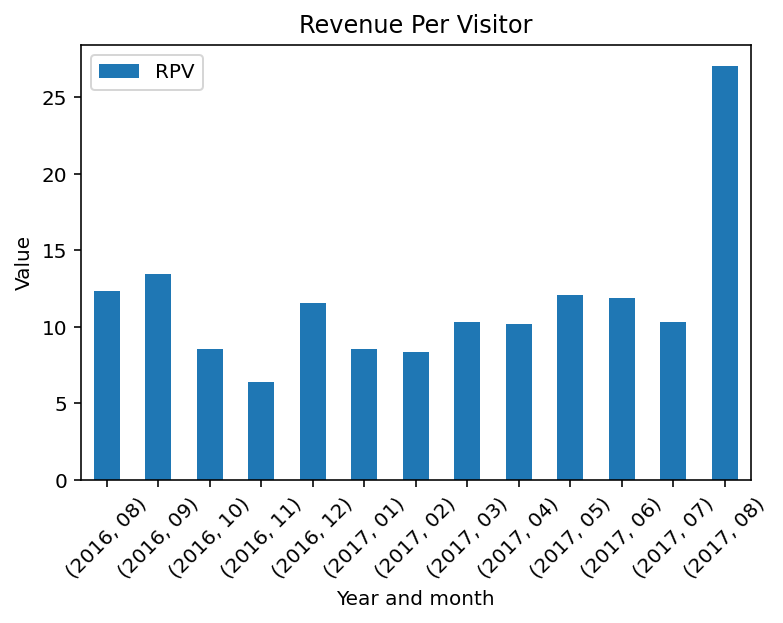

In [246]:
ax = ecom.plot.bar(y='RPV', rot=45)
plt.title('Revenue Per Visitor')
plt.xlabel('Year and month')
plt.ylabel('Value')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    13 non-null     object 
 1   month   13 non-null     object 
 2   AOV     13 non-null     float64
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes
